## Exercise 1

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:7000], y[:7000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Visualize using PCA (2 components)
# Reduce the data with PCA
pca=PCA()

# You need to populate the following variable
X_mnist_reduced = pca.fit_transform(X_mnist_train)

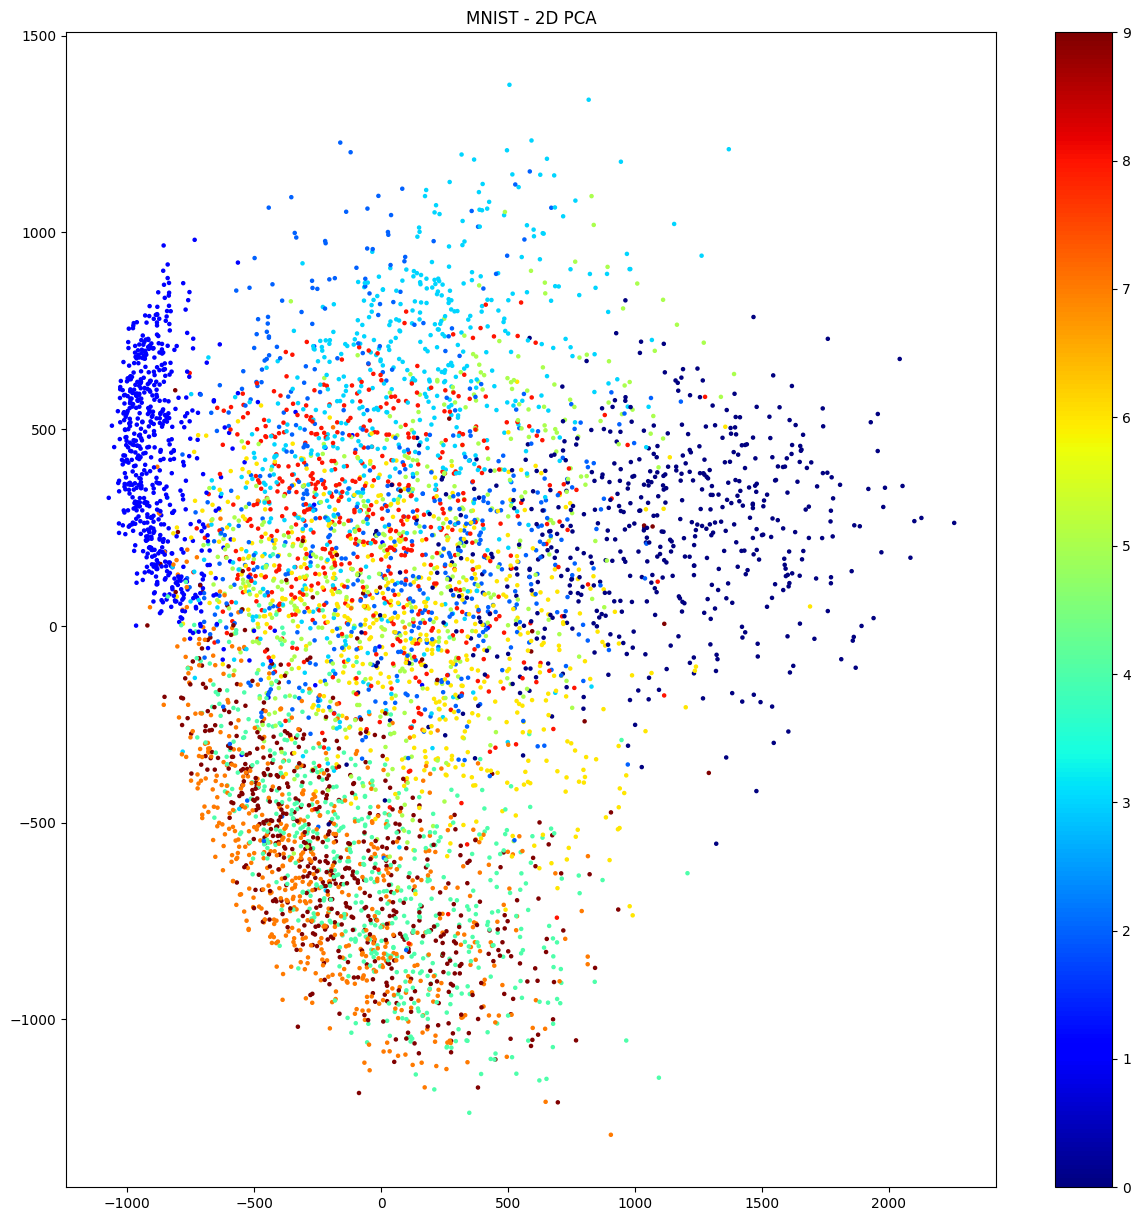

In [5]:
# Now plotting
plt.figure(figsize=(15,15))
plt.scatter(X_mnist_reduced[:, 0], X_mnist_reduced[:, 1], c=y_mnist_train, cmap="jet",s=5)
plt.colorbar()
plt.title("MNIST - 2D PCA")
plt.show()

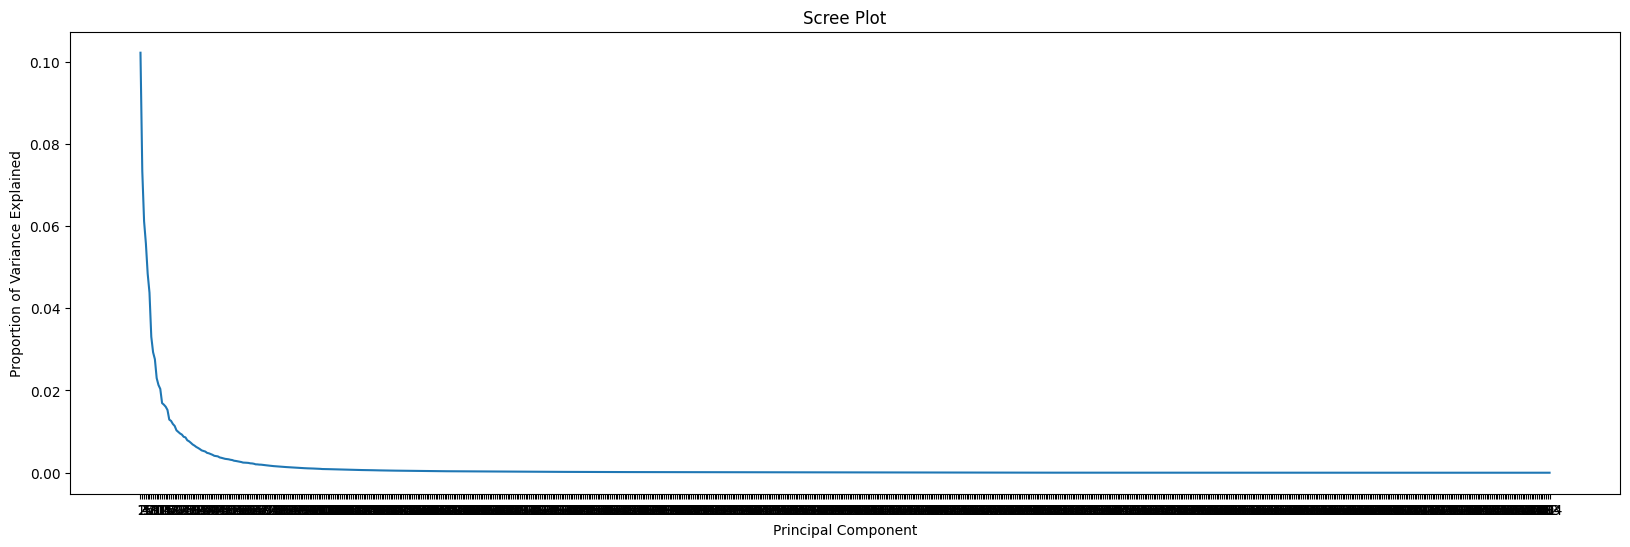

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Step 3: Scree Plot
pca_scree = X_mnist_reduced

# Step 3: Calculate Variance Explained
variance_explained = pca.explained_variance_ratio_
#print("Variance Explained per Principal Component:", variance_explained)

# Step 4: Scree Plot
plt.figure(figsize=(20, 6))
plt.plot(range(1, len(variance_explained) + 1), variance_explained)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.xticks(range(1, len(variance_explained) + 1))
plt.show()
# How do you get variance explained?

In [ ]:
# Step 4: Number of components for 95% variance
threshold = 0.95
n_components = None # What goes here???
print(f"Number of components for {threshold*100}% variance: {n_components}")

In [ ]:
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.

    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)
    
    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()

plot_mnist_digit(X_mnist_train[0])

In [ ]:
# Use PCA with n_components to transform the above digit.  How does it look?

In [18]:
# Step 5: k-NN Classification
# Without PCA
knn = KNeighborsClassifier()
knn.fit(X_mnist_train, y_mnist_train)
y_pred = knn.predict(X_mnist_test)
print(f"Original Data Accuracy: {accuracy_score(y_mnist_test, y_pred)}")

# With PCA
# You have some work to do right here


# Step 1: Fit PCA to training data
pca = PCA(n_components=0.95)  # Choose number of components to retain 95% of variance
X_mnist_train_pca = pca.fit_transform(X_mnist_train)
X_mnist_test_pca = pca.transform(X_mnist_test)

# Step 2: Train KNeighborsClassifier on transformed training data
knn_pca = KNeighborsClassifier()
knn_pca.fit(X_mnist_train_pca, y_mnist_train)

# Step 3: Evaluate the model on transformed test data
y_pred_pca = knn_pca.predict(X_mnist_test_pca)
print(f"Data with PCA Accuracy: {accuracy_score(y_mnist_test, y_pred_pca)}")



Original Data Accuracy: 0.94
Data with PCA Accuracy: 0.94


## Exercise 2

1. Try using t-SNE to visualize the MNIST data above.  How does it compare to PCA?
2. Try using a KNN classifier to predict the data with TSNE.  How does it perform?

In [24]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

X_tsne = tsne.fit_transform(X_mnist_train)

/tmp/ipykernel_5258/3699320588.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_mnist_train, cmap=plt.cm.get_cmap("jet", 10), marker='.')


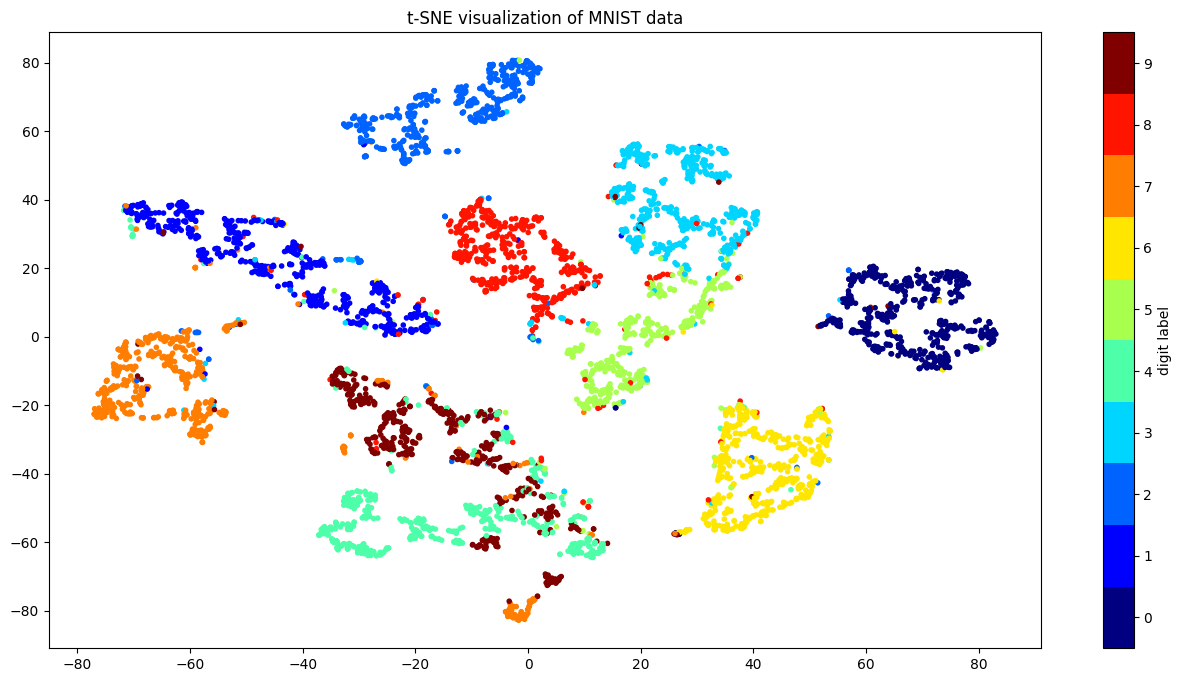

In [25]:
import matplotlib.pyplot as plt

# Assuming X_tsne is your t-SNE transformed data
# Assuming y_train is your target labels for the MNIST dataset

# Plot t-SNE transformed data
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_mnist_train, cmap=plt.cm.get_cmap("jet", 10), marker='.')
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)  # Set color limit to integer values
plt.title('t-SNE visualization of MNIST data')
plt.show()


In [15]:
# Split the dataset
X_tsne=tsne.fit_transform(X)
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

In [19]:
knn = KNeighborsClassifier()
knn.fit(X_mnist_train, y_mnist_train)
y_pred = knn.predict(X_mnist_test)
print(f"TSNE Data Accuracy: {accuracy_score(y_mnist_test, y_pred)}")



TSNE Data Accuracy: 0.94


## Exercise 3

Try using UMAP to process the MNIST data.  Visualize the data first, and then calculate accuracy with KNN.

In [22]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.0 MB/s eta 0:00:00ta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 40.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 1.1 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 1.7 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 28.1 MB/s eta 0:00:00:00:0100:01
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=35430c53ff6c77bed04b8afc5e78a870f50dd566c1e257c6b8ea4aed5f34d018
  Stored in directory: /home/codespace/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully bui

## Exercise 4

Try exploring the impact of dimensionality reduction using the following sample data.

1. How does a KNN classifier do as the number of dimensions increases?
2. Apply a PCA that captures 90% of the variance. Does it help?
3. Does UMAP help?
4. What explains the difference? 

Original Data Accuracy: 0.844


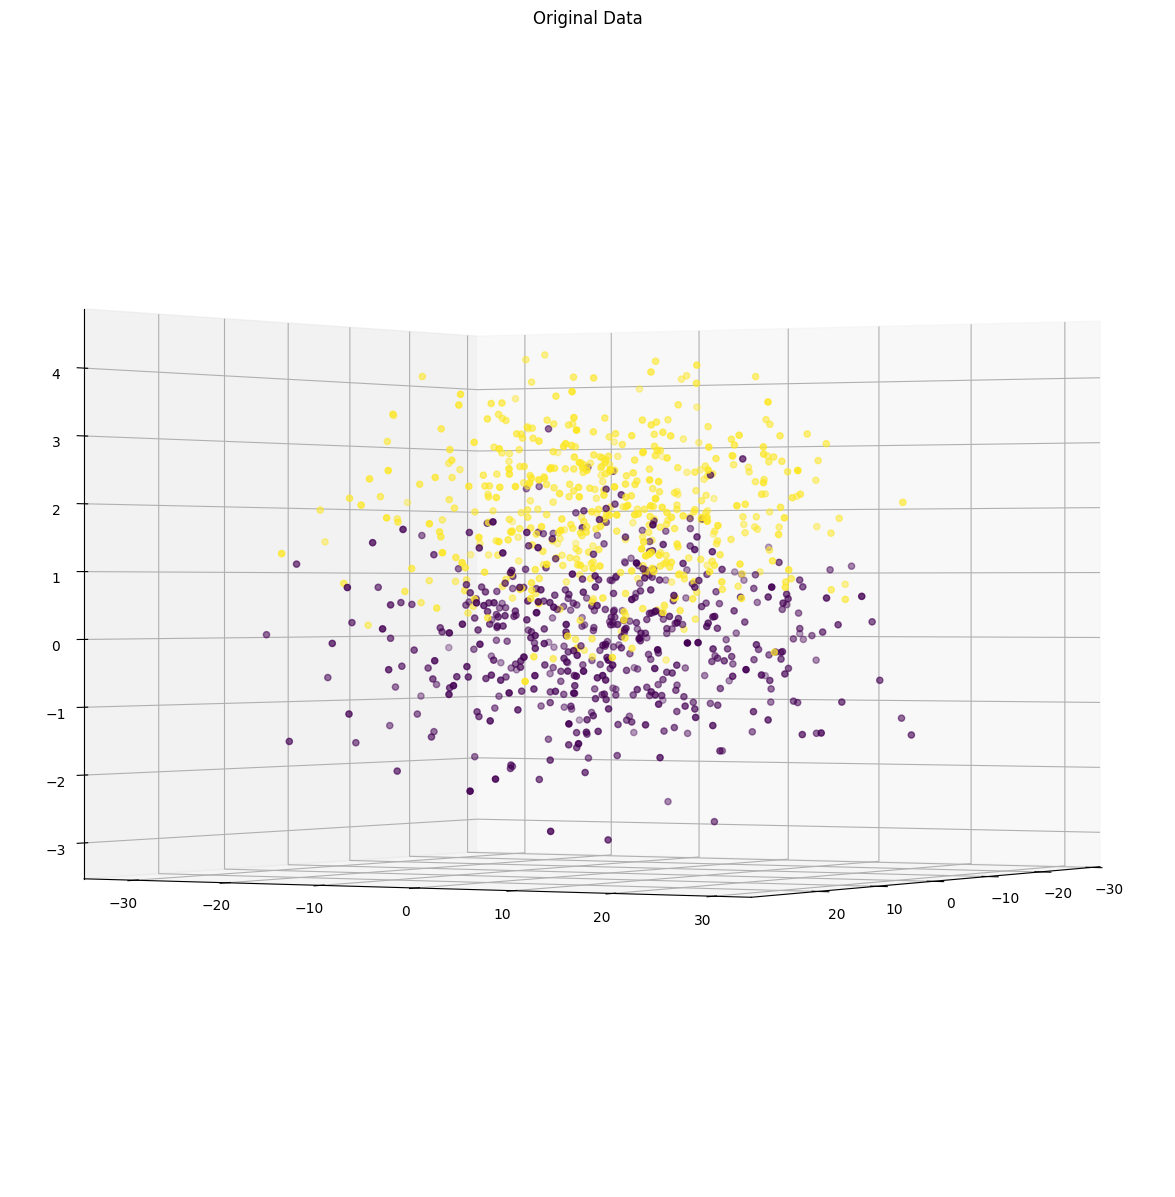

In [21]:
# Generate synthetic data
np.random.seed(0)
n_points = 500

# Class 0
x0 = np.random.normal(loc=0, scale=10, size=n_points)
y0 = np.random.normal(loc=0, scale=10, size=n_points)
z0 = np.random.normal(loc=0, scale=1, size=n_points)

# Class 1
x1 = np.random.normal(loc=0, scale=10, size=n_points)
y1 = np.random.normal(loc=0, scale=10, size=n_points)
z1 = np.random.normal(loc=2, scale=1, size=n_points)

X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)))).T
y = np.hstack((np.zeros(n_points), np.ones(n_points)))



# Train KNN on original data
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"Original Data Accuracy: {accuracy_score(y, y_pred)}")

# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title('Original Data')

plt.show()


/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


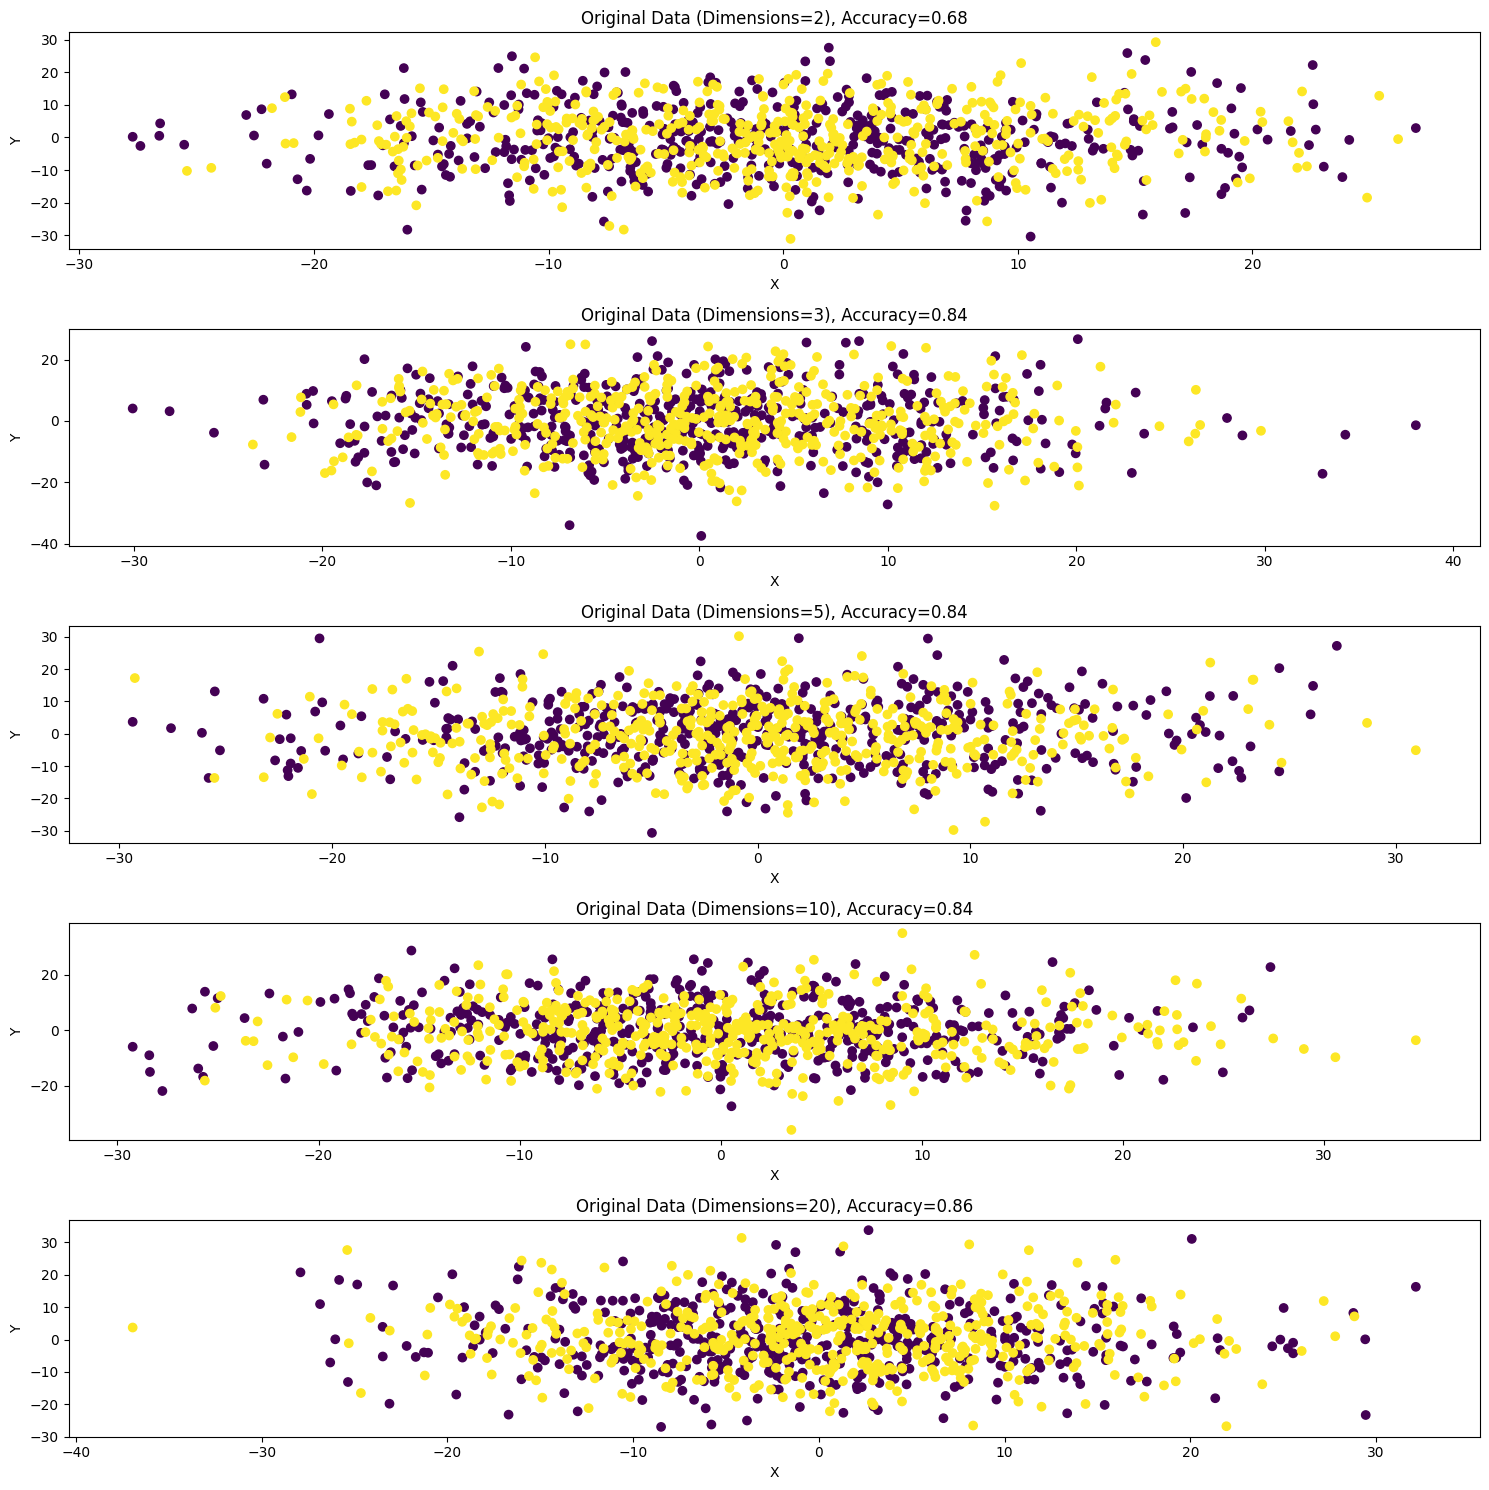

In [26]:
# 1. How does a KNN classifier do as the number of dimensions increases?
# Vary the number of dimensions in the synthetic data and observe KNN accuracy

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from umap import UMAP

# Generate synthetic data
np.random.seed(0)
n_points = 500
dimensions = [2, 3, 5, 10, 20]  # Vary dimensions

fig, axs = plt.subplots(len(dimensions), 1, figsize=(15, 15))

for i, n_dim in enumerate(dimensions):
    x0 = np.random.normal(loc=0, scale=10, size=n_points)
    y0 = np.random.normal(loc=0, scale=10, size=n_points)
    z0 = np.random.normal(loc=0, scale=1, size=n_points)
    
    x1 = np.random.normal(loc=0, scale=10, size=n_points)
    y1 = np.random.normal(loc=0, scale=10, size=n_points)
    z1 = np.random.normal(loc=2, scale=1, size=n_points)
    
    X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)))).T[:, :n_dim]
    y = np.hstack((np.zeros(n_points), np.ones(n_points)))
    
    # Train KNN on original data
    knn = KNeighborsClassifier()
    knn.fit(X, y)
    y_pred = knn.predict(X)
    accuracy = accuracy_score(y, y_pred)
    
    # Plot original data
    axs[i].scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    axs[i].set_title(f'Original Data (Dimensions={n_dim}), Accuracy={accuracy:.2f}')
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Y')

plt.tight_layout()
plt.show()
